Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings('ignore')

Load the Datasets

In [2]:
apps_df = pd.read_csv('/Users/yashikasingh/Downloads/googleplaystore.csv')
reviews_df = pd.read_csv('/Users/yashikasingh/Downloads/googleplaystore_user_reviews.csv')

Basic Data Exploration

In [3]:
# Display the first few rows of the apps dataset
print(apps_df.head())



                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

In [4]:
# Display the first few rows of the reviews dataset
print(reviews_df.head())



                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  


In [5]:
# Get basic information about both datasets
print(apps_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


In [6]:
print(reviews_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB
None


In [7]:
# Summary statistics
print(apps_df.describe())

            Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000


In [8]:
print(reviews_df.describe())

       Sentiment_Polarity  Sentiment_Subjectivity
count        37432.000000            37432.000000
mean             0.182146                0.492704
std              0.351301                0.259949
min             -1.000000                0.000000
25%              0.000000                0.357143
50%              0.150000                0.514286
75%              0.400000                0.650000
max              1.000000                1.000000


Data Cleaning

In [9]:
# Inspect the unique values in the Installs column
print(apps_df['Installs'].unique())


['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '5+' '0+' '0'
 'Free']


In [10]:
# Function to clean and convert Installs
# Function to clean and convert Installs
def clean_installs(install):
    if isinstance(install, str):  # Ensure it's a string before processing
        if 'M' in install:
            return int(float(install.replace('M', '').strip()) * 1_000_000)
        elif 'K' in install:
            return int(float(install.replace('K', '').strip()) * 1_000)
        else:
            # Handle non-numeric values by returning NaN
            return np.nan
    return np.nan  # Return NaN for non-string values




In [11]:
# Apply the function to the Installs column
apps_df['Installs'] = apps_df['Installs'].apply(clean_installs)



In [12]:
# Check how many NaN values are in the Installs column after cleaning
print(apps_df['Installs'].isnull().sum())



10841


In [13]:
# Check the unique values in the Price column before cleaning
print(apps_df['Price'].unique())


['0' '$4.99' '$3.99' '$6.99' '$1.49' '$2.99' '$7.99' '$5.99' '$3.49'
 '$1.99' '$9.99' '$7.49' '$0.99' '$9.00' '$5.49' '$10.00' '$24.99'
 '$11.99' '$79.99' '$16.99' '$14.99' '$1.00' '$29.99' '$12.99' '$2.49'
 '$10.99' '$1.50' '$19.99' '$15.99' '$33.99' '$74.99' '$39.99' '$3.95'
 '$4.49' '$1.70' '$8.99' '$2.00' '$3.88' '$25.99' '$399.99' '$17.99'
 '$400.00' '$3.02' '$1.76' '$4.84' '$4.77' '$1.61' '$2.50' '$1.59' '$6.49'
 '$1.29' '$5.00' '$13.99' '$299.99' '$379.99' '$37.99' '$18.99' '$389.99'
 '$19.90' '$8.49' '$1.75' '$14.00' '$4.85' '$46.99' '$109.99' '$154.99'
 '$3.08' '$2.59' '$4.80' '$1.96' '$19.40' '$3.90' '$4.59' '$15.46' '$3.04'
 '$4.29' '$2.60' '$3.28' '$4.60' '$28.99' '$2.95' '$2.90' '$1.97'
 '$200.00' '$89.99' '$2.56' '$30.99' '$3.61' '$394.99' '$1.26' 'Everyone'
 '$1.20' '$1.04']


In [14]:

# Function to clean and convert Price
def clean_price(price):
    if isinstance(price, str):  # Ensure it's a string before processing
        if price.startswith('$'):
            return float(price.replace('$', '').strip())
    return np.nan  # Return NaN for non-string or unexpected formats



In [15]:
# Apply the function to the Price column
apps_df['Price'] = apps_df['Price'].apply(clean_price)

# Check how many NaN values are in the Price column after cleaning
print(apps_df['Price'].isnull().sum())



10041


In [16]:
# Now we can convert the Price column to floats if there are valid entries
if not apps_df['Price'].isnull().all():  # Check if there are any valid entries
    apps_df['Price'] = apps_df['Price'].astype(float)

# Check the cleaned data
print(apps_df[['App', 'Reviews', 'Installs', 'Price']].head())

                                                 App Reviews  Installs  Price
0     Photo Editor & Candy Camera & Grid & ScrapBook     159       NaN    NaN
1                                Coloring book moana     967       NaN    NaN
2  U Launcher Lite – FREE Live Cool Themes, Hide ...   87510       NaN    NaN
3                              Sketch - Draw & Paint  215644       NaN    NaN
4              Pixel Draw - Number Art Coloring Book     967       NaN    NaN


In [17]:
# Cleaning the reviews dataset
reviews_df.dropna(subset=['Translated_Review'], inplace=True)

Data Visualization

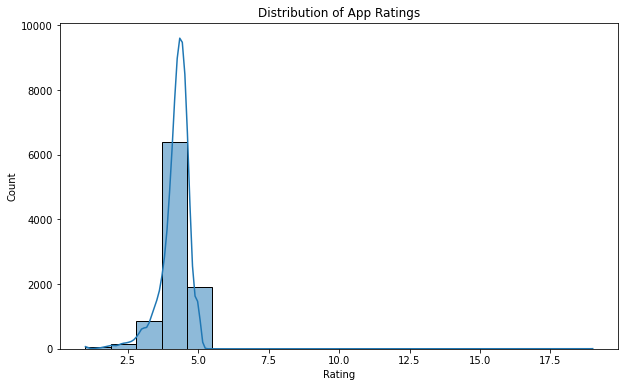

In [18]:
# Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(apps_df['Rating'], bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.show()



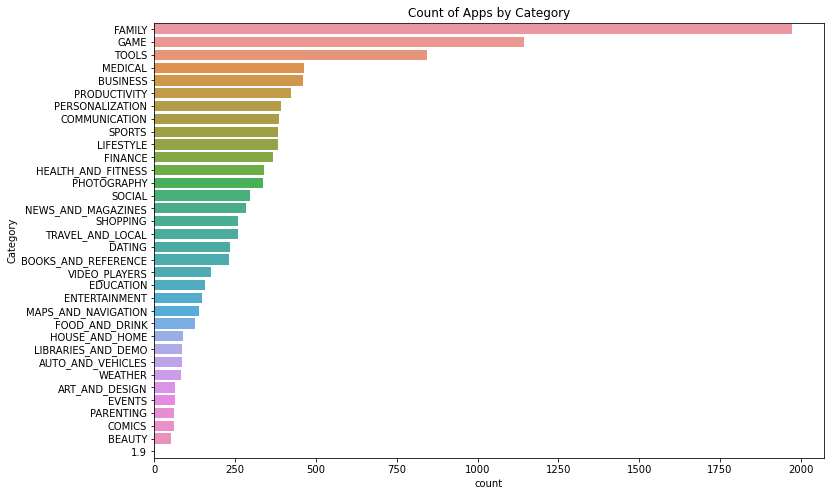

In [19]:
# Count of Apps by Category
plt.figure(figsize=(12, 8))
sns.countplot(y='Category', data=apps_df, order=apps_df['Category'].value_counts().index)
plt.title('Count of Apps by Category')
plt.show()

Sentiment Analysis of User Reviews

In [20]:
# Initialize Sentiment Intensity Analyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/yashikasingh/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [21]:
# Function to get sentiment
def get_sentiment(review):
    score = sia.polarity_scores(review)
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'
    
# Test the function
print(get_sentiment("I love this product!"))


positive


In [22]:
# Apply sentiment analysis to reviews
reviews_df['Sentiment'] = reviews_df['Translated_Review'].apply(get_sentiment)



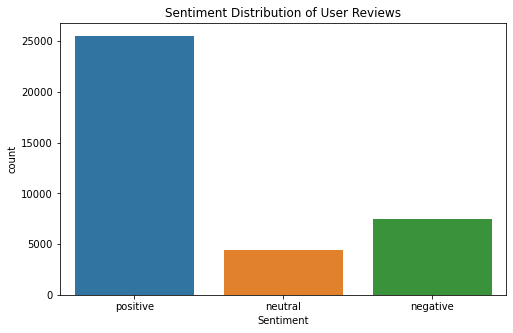

In [23]:
# Visualize sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Sentiment', data=reviews_df)
plt.title('Sentiment Distribution of User Reviews')
plt.show()

Analyzing Key Metrics

In [24]:
# Average rating by category
avg_rating_by_category = apps_df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
print(avg_rating_by_category)



Category
1.9                    19.000000
EVENTS                  4.435556
EDUCATION               4.389032
ART_AND_DESIGN          4.358065
BOOKS_AND_REFERENCE     4.346067
PERSONALIZATION         4.335987
PARENTING               4.300000
GAME                    4.286326
BEAUTY                  4.278571
HEALTH_AND_FITNESS      4.277104
SHOPPING                4.259664
SOCIAL                  4.255598
WEATHER                 4.244000
SPORTS                  4.223511
PRODUCTIVITY            4.211396
HOUSE_AND_HOME          4.197368
FAMILY                  4.192272
PHOTOGRAPHY             4.192114
AUTO_AND_VEHICLES       4.190411
MEDICAL                 4.189143
LIBRARIES_AND_DEMO      4.178462
FOOD_AND_DRINK          4.166972
COMMUNICATION           4.158537
COMICS                  4.155172
NEWS_AND_MAGAZINES      4.132189
FINANCE                 4.131889
ENTERTAINMENT           4.126174
BUSINESS                4.121452
TRAVEL_AND_LOCAL        4.109292
LIFESTYLE               4.094904
V

In [25]:
# Most popular apps (by installs)
most_installed_apps = apps_df[['App', 'Installs']].sort_values(by='Installs', ascending=False).head(10)
print(most_installed_apps)



                                                 App  Installs
0     Photo Editor & Candy Camera & Grid & ScrapBook       NaN
1                                Coloring book moana       NaN
2  U Launcher Lite – FREE Live Cool Themes, Hide ...       NaN
3                              Sketch - Draw & Paint       NaN
4              Pixel Draw - Number Art Coloring Book       NaN
5                         Paper flowers instructions       NaN
6            Smoke Effect Photo Maker - Smoke Editor       NaN
7                                   Infinite Painter       NaN
8                               Garden Coloring Book       NaN
9                      Kids Paint Free - Drawing Fun       NaN


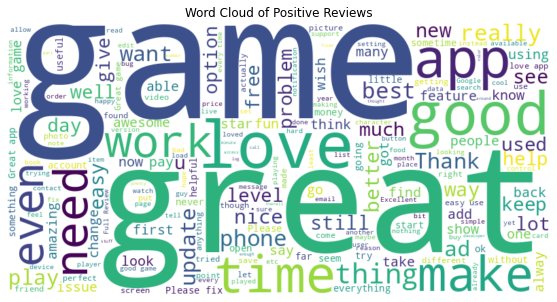

In [26]:
# Word cloud for positive reviews
positive_reviews = reviews_df[reviews_df['Sentiment'] == 'positive']['Translated_Review']
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_reviews))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Reviews')
plt.show()

Predictive Modeling

In [27]:
# Convert text to numerical data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(reviews_df['Translated_Review'])
y = reviews_df['Sentiment']



In [28]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [29]:
# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)



LogisticRegression(max_iter=1000)

In [30]:
# Make predictions
y_pred = model.predict(X_test)



In [31]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.90
              precision    recall  f1-score   support

    negative       0.85      0.76      0.80      1541
     neutral       0.78      0.82      0.80       892
    positive       0.93      0.95      0.94      5053

    accuracy                           0.90      7486
   macro avg       0.85      0.84      0.85      7486
weighted avg       0.90      0.90      0.90      7486

